In [49]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torchvision import datasets, transforms
import torch.optim as optim
from tqdm import tqdm

In [50]:
device= torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [51]:
train_transforms= transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.49139968,0.48215841,0.44653091),(0.24703223,0.24348513,0.26158784))
    transforms.RandomRotation((-7.0,7.0),fill=(1,)),
    transforms.RandomHorizontalFlip(),
])

test_transforms= transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.49139968,0.48215841,0.44653091),(0.24703223,0.24348513,0.26158784,)) 
])

In [52]:
train_data= datasets.CIFAR10(root= '../data', train= True, download= True, transform= train_transforms)
test_data= datasets.CIFAR10(root= '../data', train= False, download= True, transform= test_transforms)

Files already downloaded and verified
Files already downloaded and verified


In [53]:
dataloader_args= dict(shuffle= True, batch_size= 128, num_workers= 4, pin_memory= True) if torch.cuda.is_available() else dict(shuffle= True, batch_size= 64)

In [54]:
train_loader= torch.utils.data.DataLoader(train_data, **dataloader_args)
test_loader= torch.utils.data.DataLoader(test_data, **dataloader_args)

In [55]:
# print(train_data.data.shape)
# print(train_data.data.mean(axis=(0,1,2))/255)
# print(train_data.data.std(axis=(0,1,2))/255)

# (50000, 32, 32, 3)
# [0.49139968 0.48215841 0.44653091]
# [0.24703223 0.24348513 0.26158784]

In [56]:
from model import Model_batch_norm,Model_group_norm,Model_layer_norm

In [57]:
model_b= Model_batch_norm().to(device)
summary(model_b, input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
       BatchNorm2d-3           [-1, 16, 32, 32]              32
            Conv2d-4           [-1, 32, 32, 32]           4,608
              ReLU-5           [-1, 32, 32, 32]               0
       BatchNorm2d-6           [-1, 32, 32, 32]              64
            Conv2d-7           [-1, 16, 34, 34]             512
              ReLU-8           [-1, 16, 34, 34]               0
       BatchNorm2d-9           [-1, 16, 34, 34]              32
        MaxPool2d-10           [-1, 16, 17, 17]               0
           Conv2d-11           [-1, 32, 17, 17]           4,608
             ReLU-12           [-1, 32, 17, 17]               0
      BatchNorm2d-13           [-1, 32, 17, 17]              64
           Conv2d-14           [-1, 32,

/Users/hemant/Documents/Deep_Learning_Courses/ERA_Course/Assignment_8/model.py:79: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [58]:
from train_test import train, test

In [14]:
epochs=5
optimizer= optim.SGD(model_b.parameters(), lr=0.01, momentum=0.9)
for i in range(1,epochs+1):
    print("EPOCH:", i)
    train(model_b, device, train_loader, optimizer)
    test(model_b, device, test_loader)

EPOCH: 1


  0%|          | 0/782 [00:00<?, ?it/s]/Users/hemant/Documents/Deep_Learning_Courses/ERA_Course/Assignment_8/model.py:79: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)
Loss=1.496031403541565 Accuracy=51.48: 100%|██████████| 782/782 [01:47<00:00,  7.26it/s] 



Test set: Average loss: 1.1378, Accuracy: 6026/10000 (60.26%)

EPOCH: 2


Loss=0.6969391107559204 Accuracy=67.17: 100%|██████████| 782/782 [01:49<00:00,  7.11it/s]



Test set: Average loss: 0.8992, Accuracy: 6830/10000 (68.30%)

EPOCH: 3


Loss=1.200422763824463 Accuracy=72.73: 100%|██████████| 782/782 [01:51<00:00,  7.03it/s] 



Test set: Average loss: 0.7480, Accuracy: 7409/10000 (74.09%)

EPOCH: 4


Loss=0.8028671145439148 Accuracy=75.71: 100%|██████████| 782/782 [01:54<00:00,  6.84it/s] 



Test set: Average loss: 0.7092, Accuracy: 7568/10000 (75.68%)

EPOCH: 5


Loss=0.4368749260902405 Accuracy=77.97: 100%|██████████| 782/782 [01:53<00:00,  6.91it/s] 



Test set: Average loss: 0.6828, Accuracy: 7655/10000 (76.55%)



In [59]:
epochs=5
optimizer= optim.SGD(model_b.parameters(), lr=0.01, momentum=0.9)
for i in range(1,epochs+1):
    print("EPOCH:", i)
    train(model_b, device, train_loader, optimizer)
    test(model_b, device, test_loader)

EPOCH: 1


Loss=1.45414400100708 Accuracy=52.40: 100%|██████████| 782/782 [01:44<00:00,  7.51it/s]  



Test set: Average loss: 1.0558, Accuracy: 6225/10000 (62.25%)

EPOCH: 2


Loss=0.6718727350234985 Accuracy=67.44: 100%|██████████| 782/782 [01:48<00:00,  7.23it/s]



Test set: Average loss: 0.8588, Accuracy: 6994/10000 (69.94%)

EPOCH: 3


Loss=0.46339038014411926 Accuracy=73.02: 100%|██████████| 782/782 [01:52<00:00,  6.95it/s]



Test set: Average loss: 0.7962, Accuracy: 7228/10000 (72.28%)

EPOCH: 4


Loss=0.603853702545166 Accuracy=75.99: 100%|██████████| 782/782 [01:54<00:00,  6.85it/s]  



Test set: Average loss: 0.7033, Accuracy: 7556/10000 (75.56%)

EPOCH: 5


Loss=1.0376912355422974 Accuracy=78.44: 100%|██████████| 782/782 [01:54<00:00,  6.81it/s] 



Test set: Average loss: 0.6765, Accuracy: 7679/10000 (76.79%)



In [16]:
# group norm model
model_g= Model_group_norm().to(device)
summary(model_g, input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
         GroupNorm-3           [-1, 16, 32, 32]              32
            Conv2d-4           [-1, 32, 32, 32]           4,608
              ReLU-5           [-1, 32, 32, 32]               0
         GroupNorm-6           [-1, 32, 32, 32]              64
            Conv2d-7           [-1, 16, 34, 34]             512
              ReLU-8           [-1, 16, 34, 34]               0
         GroupNorm-9           [-1, 16, 34, 34]              32
        MaxPool2d-10           [-1, 16, 17, 17]               0
           Conv2d-11           [-1, 32, 17, 17]           4,608
             ReLU-12           [-1, 32, 17, 17]               0
        GroupNorm-13           [-1, 32, 17, 17]              64
           Conv2d-14           [-1, 32,

/Users/hemant/Documents/Deep_Learning_Courses/ERA_Course/Assignment_8/model.py:157: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [19]:
epochs=5
optimizer= optim.SGD(model_g.parameters(), lr=0.01, momentum=0.9)
for i in range(1,epochs+1):
    print("EPOCH:", i)
    train(model_g, device, train_loader, optimizer)
    test(model_g, device, test_loader)

EPOCH: 1


Loss=1.2023046016693115 Accuracy=47.12: 100%|██████████| 782/782 [01:42<00:00,  7.66it/s]



Test set: Average loss: 1.2135, Accuracy: 5650/10000 (56.50%)

EPOCH: 2


Loss=0.9720831513404846 Accuracy=63.17: 100%|██████████| 782/782 [01:44<00:00,  7.48it/s]



Test set: Average loss: 1.0278, Accuracy: 6421/10000 (64.21%)

EPOCH: 3


Loss=1.1946169137954712 Accuracy=69.81: 100%|██████████| 782/782 [01:45<00:00,  7.39it/s]



Test set: Average loss: 0.8806, Accuracy: 6936/10000 (69.36%)

EPOCH: 4


Loss=0.727527379989624 Accuracy=73.37: 100%|██████████| 782/782 [01:46<00:00,  7.33it/s]  



Test set: Average loss: 0.8095, Accuracy: 7198/10000 (71.98%)

EPOCH: 5


Loss=0.7859549522399902 Accuracy=76.42: 100%|██████████| 782/782 [01:49<00:00,  7.16it/s] 



Test set: Average loss: 0.7362, Accuracy: 7460/10000 (74.60%)



In [9]:
model_l= Model_layer_norm().to(device)
summary(model_l, input_size=(3,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
              ReLU-2           [-1, 16, 32, 32]               0
         GroupNorm-3           [-1, 16, 32, 32]              32
            Conv2d-4           [-1, 32, 32, 32]           4,608
              ReLU-5           [-1, 32, 32, 32]               0
         GroupNorm-6           [-1, 32, 32, 32]              64
            Conv2d-7           [-1, 16, 34, 34]             512
              ReLU-8           [-1, 16, 34, 34]               0
         GroupNorm-9           [-1, 16, 34, 34]              32
        MaxPool2d-10           [-1, 16, 17, 17]               0
           Conv2d-11           [-1, 32, 17, 17]           4,608
             ReLU-12           [-1, 32, 17, 17]               0
        GroupNorm-13           [-1, 32, 17, 17]              64
           Conv2d-14           [-1, 32,

/Users/hemant/Documents/Deep_Learning_Courses/ERA_Course/Assignment_8/model.py:236: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


In [12]:
epochs=5
optimizer= optim.SGD(model_l.parameters(), lr=0.01, momentum=0.9)
for i in range(1,epochs+1):
    print("EPOCH:", i)
    train(model_l, device, train_loader, optimizer)
    test(model_l, device, test_loader)

EPOCH: 1


Loss=0.8980305194854736 Accuracy=44.00: 100%|██████████| 782/782 [01:42<00:00,  7.61it/s]



Test set: Average loss: 1.2486, Accuracy: 5531/10000 (55.31%)

EPOCH: 2


Loss=1.0875978469848633 Accuracy=61.37: 100%|██████████| 782/782 [01:48<00:00,  7.21it/s]



Test set: Average loss: 0.9766, Accuracy: 6534/10000 (65.34%)

EPOCH: 3


Loss=0.5845539569854736 Accuracy=68.61: 100%|██████████| 782/782 [01:47<00:00,  7.28it/s]



Test set: Average loss: 0.8717, Accuracy: 6991/10000 (69.91%)

EPOCH: 4


Loss=0.7025521397590637 Accuracy=72.88: 100%|██████████| 782/782 [01:47<00:00,  7.27it/s] 



Test set: Average loss: 0.8137, Accuracy: 7199/10000 (71.99%)

EPOCH: 5


Loss=0.6720433831214905 Accuracy=75.57: 100%|██████████| 782/782 [01:47<00:00,  7.29it/s] 



Test set: Average loss: 0.7550, Accuracy: 7367/10000 (73.67%)



In [34]:
def test_and_find_misclassified(model, dataloader):
    model.eval()
    misclassified_images = []
    misclassified_labels = []
    misclassified_preds = []
    
    with torch.no_grad():
        for batch in dataloader:
            inputs = batch[0].to(device)
            labels = batch[1].to(device)
            outputs = model(inputs)
            _, predictions = torch.max(outputs, 1)
            
            # find the indices of the misclassified images
            misclassified_indices = torch.where(predictions != labels)[0]
            
            # store the misclassified images, true labels and predictions
            misclassified_images.append(inputs[misclassified_indices])
            misclassified_labels.append(labels[misclassified_indices])
            misclassified_preds.append(predictions[misclassified_indices])
            
    return misclassified_images, misclassified_labels, misclassified_preds





In [35]:
misclassified_images, misclassified_labels, misclassified_preds = test_and_find_misclassified(model_l, train_loader)


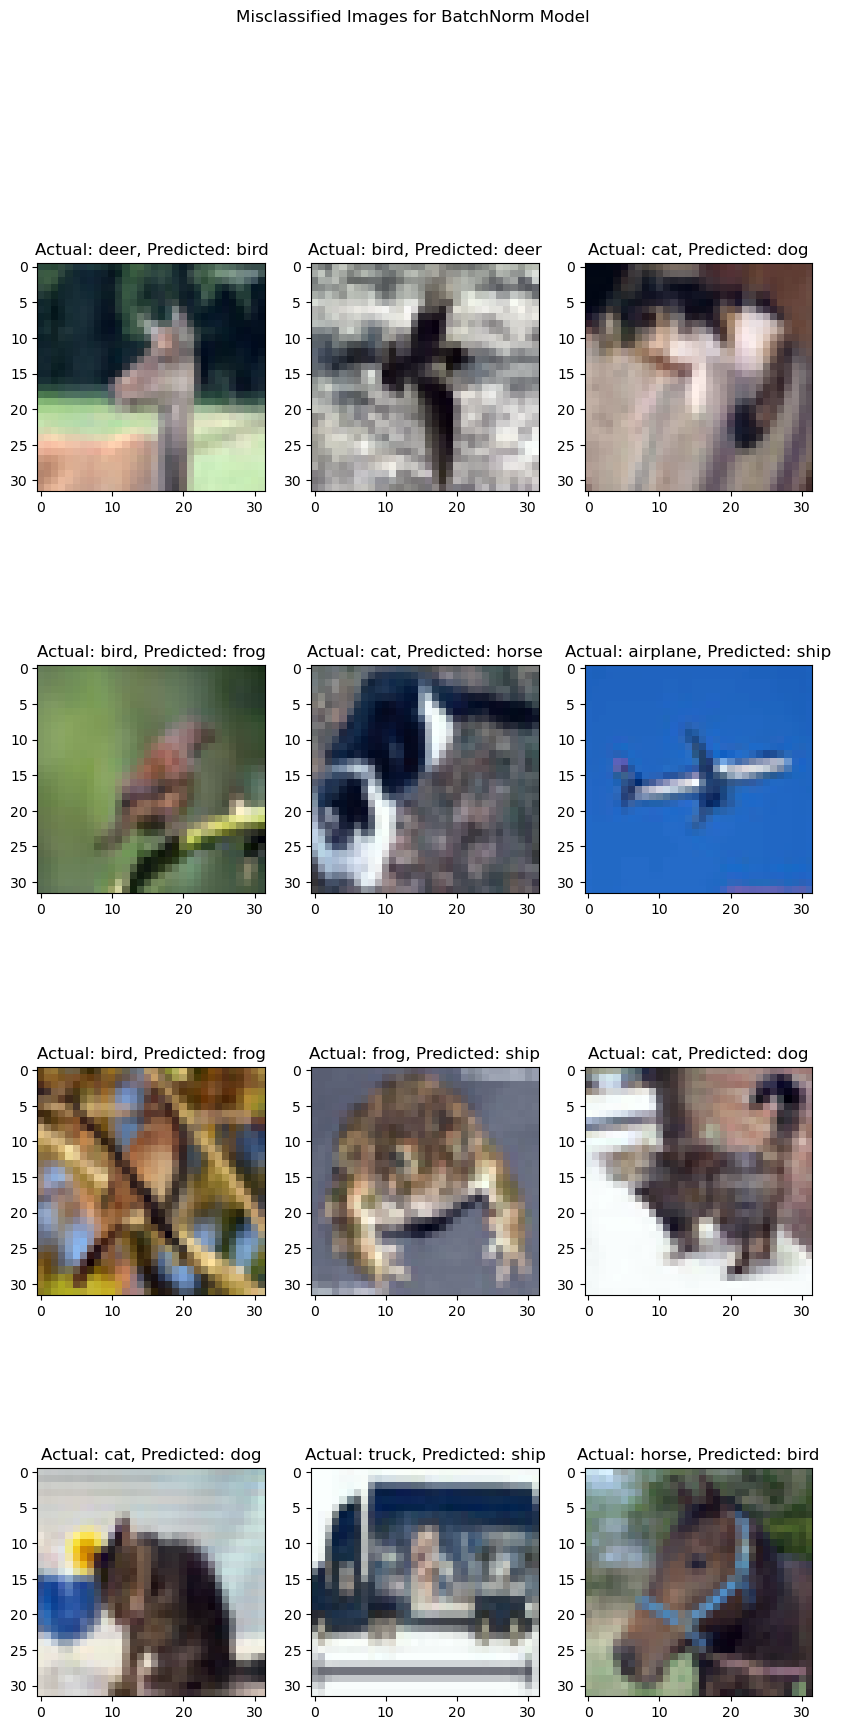

In [48]:
import matplotlib.pyplot as plt

cifar10_classes = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}


def display_misclassified_images(images, labels, preds, title):
    plt.figure(figsize=(10, 20))
    for i in range(12):
        plt.subplot(4, 3, i+1)
        image = images[i].numpy().transpose((1, 2, 0))  # adjust this if your image is not 3-channel RGB
        image = (image - image.min()) / (image.max() - image.min())  # normalise to [0,1]
        plt.imshow(image)
        plt.title(f'Actual: {cifar10_classes[labels[i].item()]}, Predicted: {cifar10_classes[preds[i].item()]}')
    plt.suptitle(title)
    plt.show()

display_misclassified_images(misclassified_images[0][:12], misclassified_labels[0][:12], misclassified_preds[0][:12], 'Misclassified Images for BatchNorm Model')